# Air line Data Set 
- An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.





## Import the library 

In [470]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn import linear_model  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split 
from mlxtend.evaluate import bias_variance_decomp

%matplotlib inline
sns.set()


## import DataSet and get information

In [471]:
Data_Airline = pd.read_csv('Predict Price of Airline Tickets.csv')

Data_Airline.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [472]:
#Get the information of the dataset  
#All feature are object except the price  
Data_Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [473]:
# check any is duplicated , if there are duplication , i will remove that 

Data_Airline.duplicated().any()

True

In [474]:
Data_Airline.drop_duplicates(inplace = True)
Data_Airline.duplicated().any()

False

In [475]:
#check any Nan Data 
Data_Airline.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [476]:
# drop any nan data 
Data_Airline.dropna(inplace=True)
Data_Airline.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [477]:
Data_Airline.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## EDA

In [478]:
# DataSet after remove the duplication and NAN data 
Data_Airline.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [479]:
#filter the Date_of_Journey into day , month and years
Data_Airline['Date_of_Journey']= pd.to_datetime(Data_Airline['Date_of_Journey'],format='%d/%m/%Y')

Data_Airline['Days'] = pd.to_datetime(Data_Airline['Date_of_Journey']).dt.day
Data_Airline['Month'] = pd.to_datetime(Data_Airline['Date_of_Journey']).dt.month
Data_Airline['Years']= pd.to_datetime(Data_Airline['Date_of_Journey']).dt.year

Data_Airline.drop('Date_of_Journey',axis=1, inplace = True)
Data_Airline.head()



,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Years
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [480]:
# print the unique days , month , years 
print ("the unique data of the days : ")
print (Data_Airline['Days'].unique())
print ("the unique data of the Months : ")
print (Data_Airline['Month'].unique())
print ("the unique data of the Years : ")
print (Data_Airline['Years'].unique())


the unique data of the days : 
[24  1  9 12 27 18  3 15  6 21]
the unique data of the Months : 
[3 5 6 4]
the unique data of the Years : 
[2019]


#### Comment : 
- years can be dropped  because all Data in the same year (2019)

In [481]:
# filter the dep time to hours and minutes 
Data_Airline['Hours_Start'] = pd.to_datetime(Data_Airline['Dep_Time']).dt.hour
Data_Airline['Mint_Start'] = pd.to_datetime(Data_Airline['Dep_Time']).dt.minute

# filter the Arrival time to the hours andminutes  
Data_Airline['Hours_Arrive']= pd.to_datetime(Data_Airline['Arrival_Time']).dt.hour
Data_Airline['Minut_Arrive']= pd.to_datetime(Data_Airline['Arrival_Time']).dt.minute


Data_Airline.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Years,Hours_Start,Mint_Start,Hours_Arrive,Minut_Arrive
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [482]:
# drop the Dep time after the filter the hours and minutes 
Data_Airline.drop('Dep_Time',axis=1, inplace =True)
#drop the arrival time after the filter the hous and minute 
Data_Airline.drop('Arrival_Time',axis =1 , inplace = True)
# Drop the years because the all data set in 2019 
Data_Airline.drop('Years' , axis =1 , inplace =True)

#see the data 
Data_Airline.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Days,Month,Hours_Start,Mint_Start,Hours_Arrive,Minut_Arrive
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [483]:
Duration = list(Data_Airline['Duration'])
Hours_Duration = 0
Min_Duration =0 
Data_Duration = []
for Index in range (0,len(Duration)): 
    split_Duration = Duration[Index].split()
    if len(split_Duration) == 2 :
        Data_Duration.append(float(split_Duration[0][0]) + 0.1*float(split_Duration[1][0]))
    else : 
        Data_Duration.append(float(split_Duration[0][0]))

Data_Airline['Duration_Fnial']= Data_Duration

Data_Airline.drop('Duration',axis =1 ,inplace = True)
Data_Airline.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Month,Hours_Start,Mint_Start,Hours_Arrive,Minut_Arrive,Duration_Fnial
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2.5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7.2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,1.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5.2
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4.4


In [484]:
Hours_Start = list (Data_Airline['Hours_Arrive'])
Min_Start = list (Data_Airline ['Minut_Arrive'] )
Arrive_Time = [] 
for Index in range (0, len(Hours_Start)): 
    Arrive_Time.append(Hours_Start[Index]+(0.01*Min_Start[Index]))

Data_Airline.drop('Hours_Arrive',axis=1,inplace =True)
Data_Airline.drop('Minut_Arrive',axis=1,inplace =True)
Data_Airline['Arrive_Time'] = Arrive_Time
Data_Airline.head(n=1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Month,Hours_Start,Mint_Start,Duration_Fnial,Arrive_Time
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,2.5,1.1


In [485]:
Hours_Start = list (Data_Airline['Hours_Start'])
Min_Start = list (Data_Airline ['Mint_Start'] )
Starting_Time = [] 
for Index in range (0, len(Hours_Start)): 
    Starting_Time.append(Hours_Start[Index]+(0.01*Min_Start[Index]))

Data_Airline.drop('Hours_Start',axis=1,inplace =True)
Data_Airline.drop('Mint_Start',axis=1,inplace =True)
Data_Airline['Starting_Time'] = Starting_Time
Data_Airline.head(n=1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Month,Duration_Fnial,Arrive_Time,Starting_Time
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2.5,1.1,22.2


#### Comment : 
- In Duration select the hours and min by using the this code 

<AxesSubplot:xlabel='Month', ylabel='Price'>

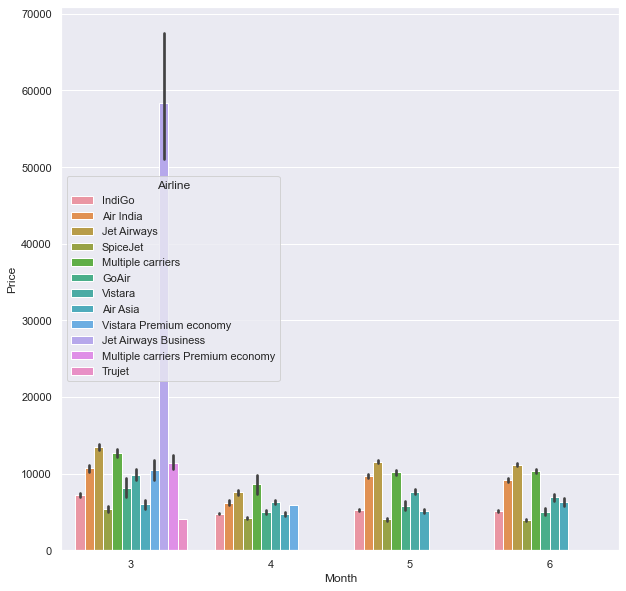

In [486]:
plt.figure(figsize=(10,10))
sns.barplot (x=Data_Airline['Month'],y=Data_Airline['Price'],hue= Data_Airline['Airline'])

#### Comment : 
- in march 2019 :
    A crisis at India’s Jet Airways deepened on Tuesday as an increasingly worried Indian government called for an emergency meeting, angry passengers demanded refunds and pilots threatened to go on strike over unpaid salaries.


<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

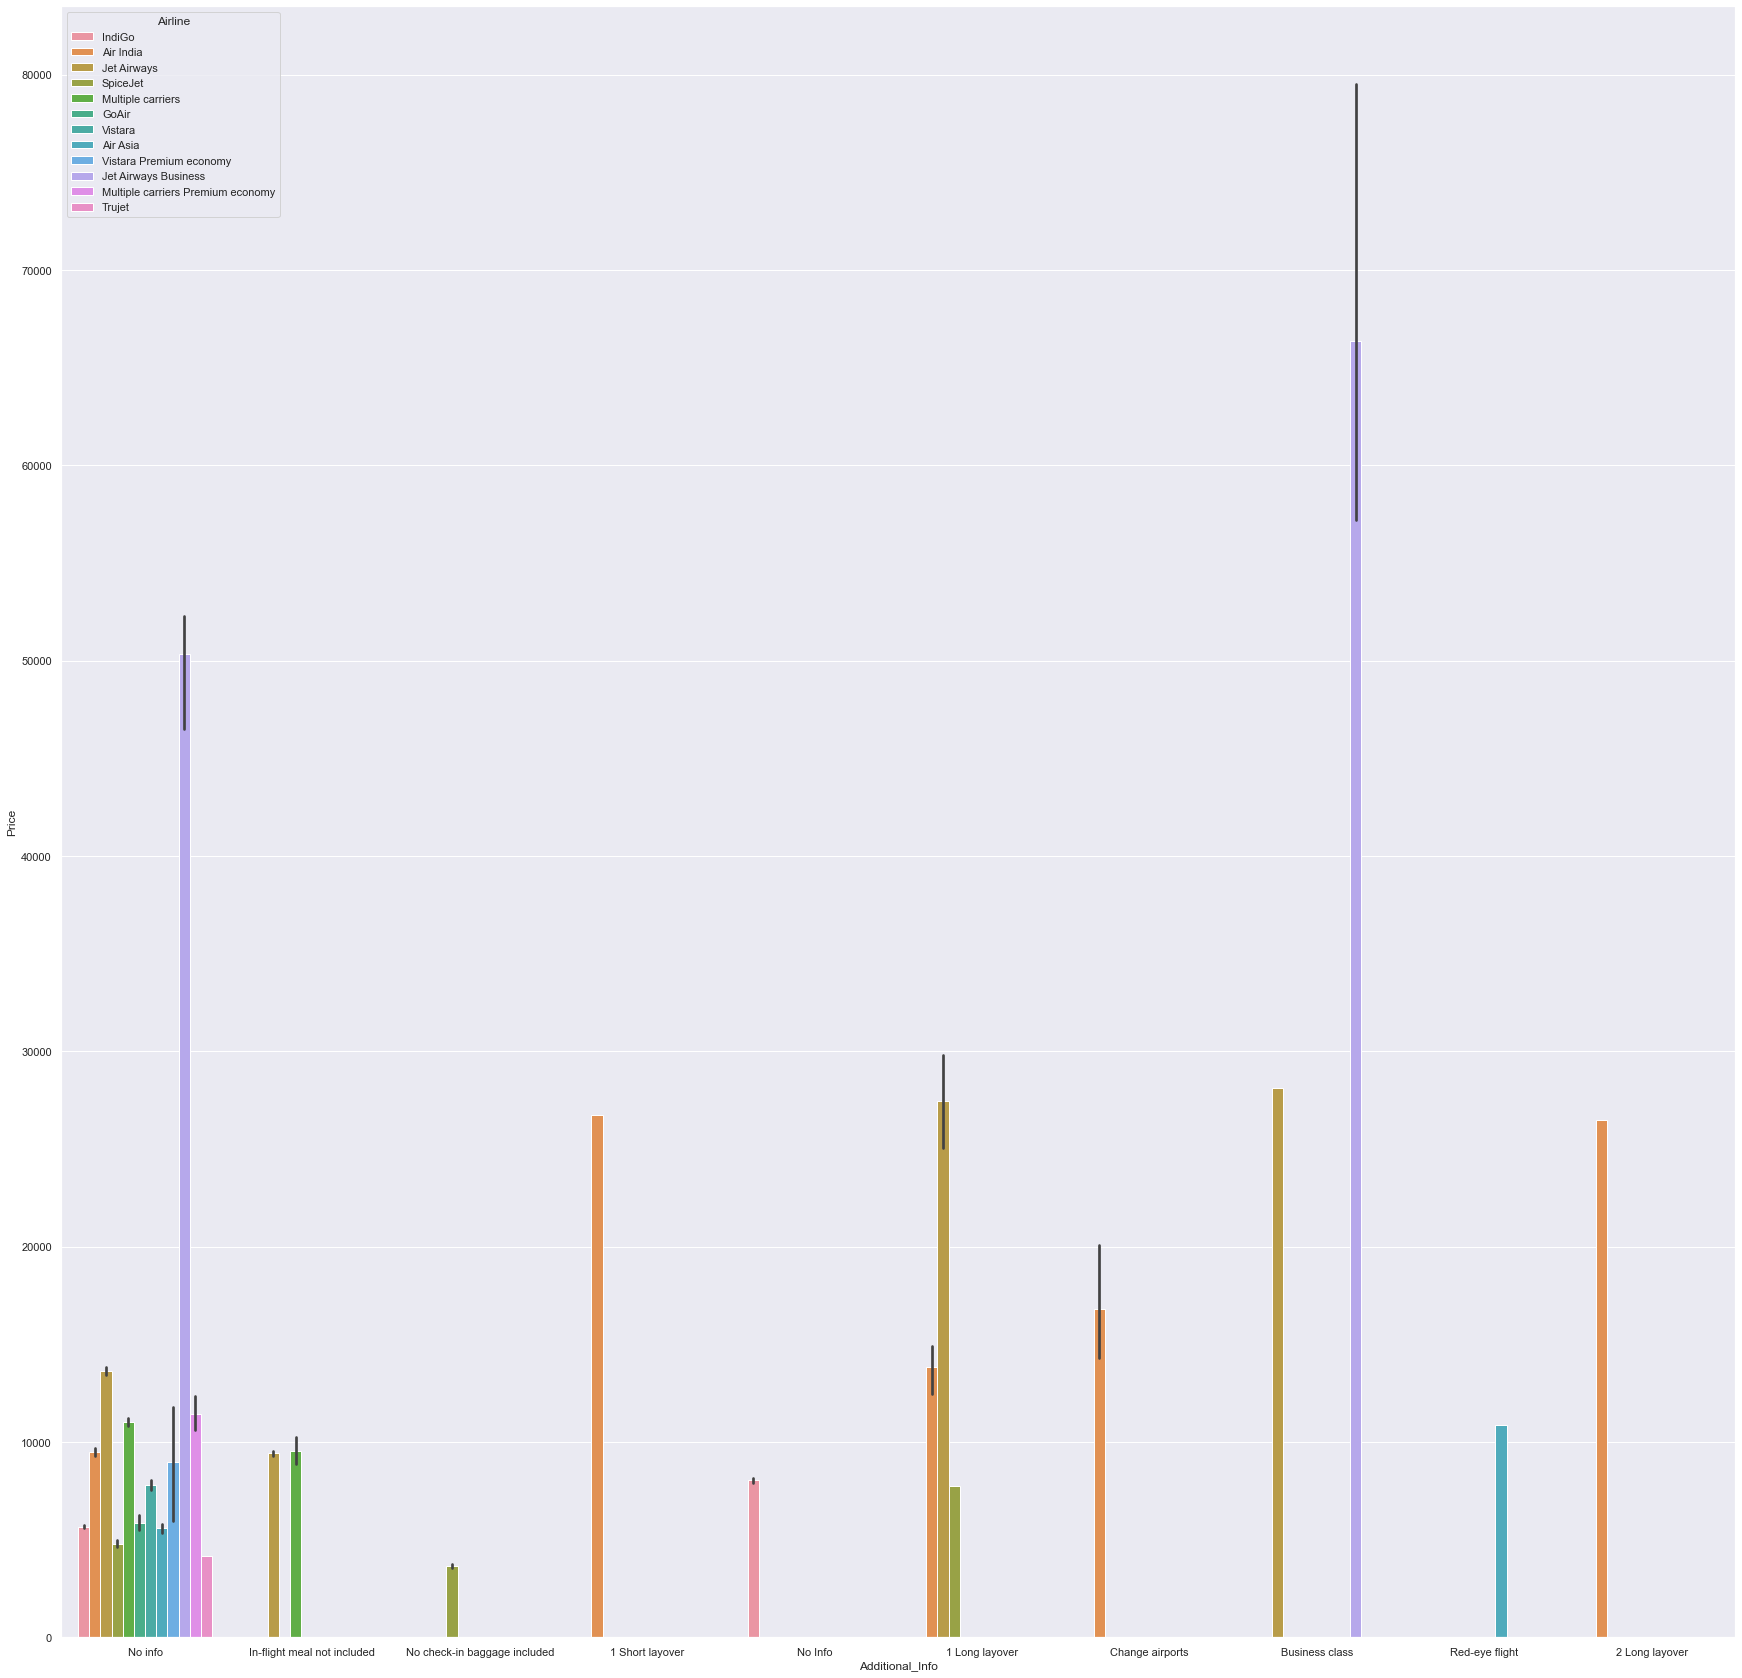

In [487]:
plt.figure(figsize= (30,30))
sns.barplot(x= Data_Airline['Additional_Info'] , y = Data_Airline['Price']  , hue =Data_Airline['Airline'])

#### Comment : 
- In March 2019 : the jet Airway buisness is most exensive between all Airlines 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

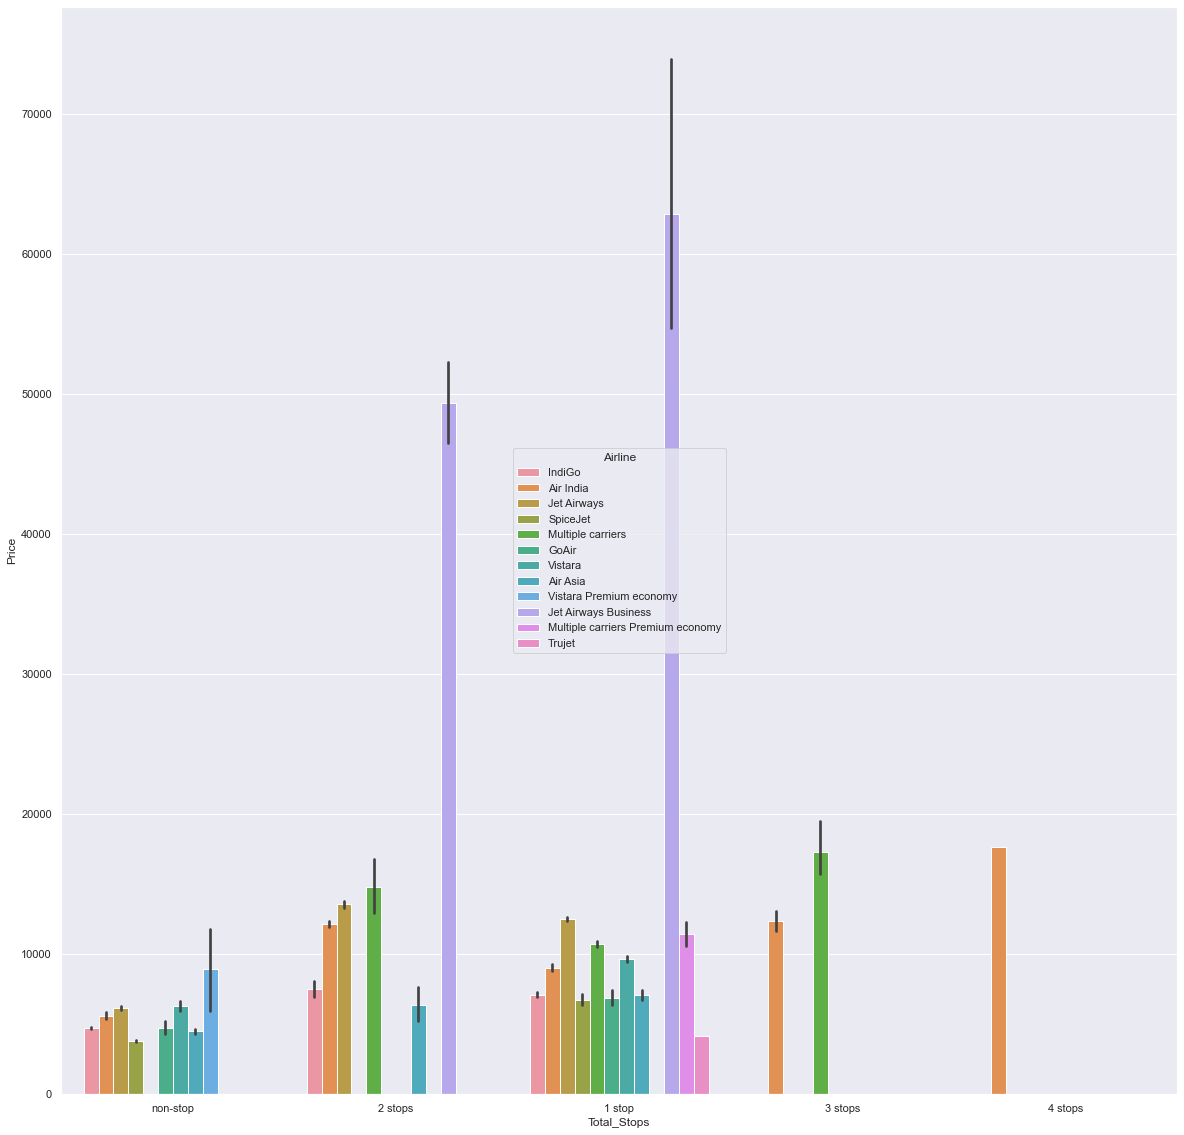

In [488]:
plt.figure(figsize= (20,20))
sns.barplot(x= Data_Airline['Total_Stops'] , y = Data_Airline['Price']  , hue =Data_Airline['Airline'])

#### Comment: 
- Jet AirWays Buisness : if numeber of stops decrease , the cost of travel increase 


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

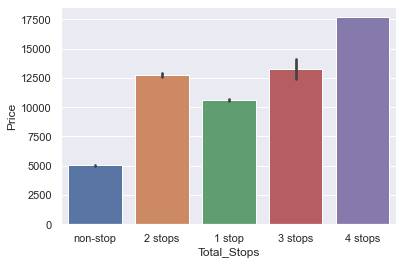

In [489]:
sns.barplot (x=Data_Airline['Total_Stops'] , y =Data_Airline['Price'] )

##### Comment : 
- Over all , if the number of stop increase , the cost of journey increase 

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

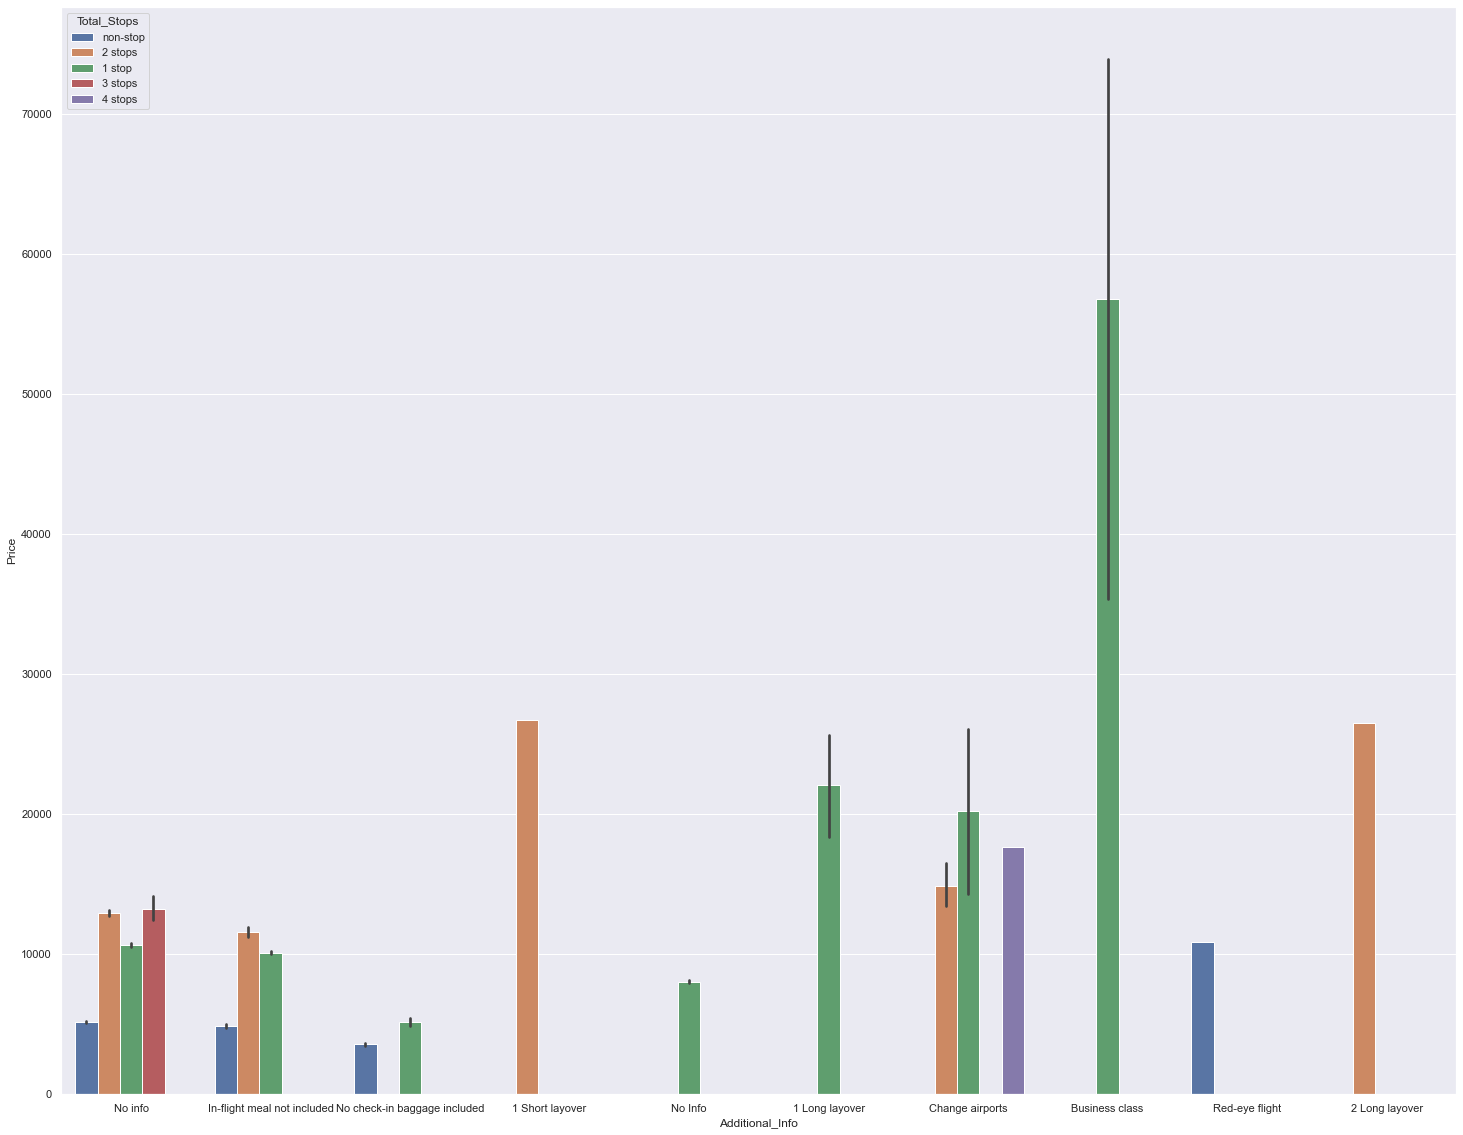

In [490]:
plt.figure(figsize= (25 ,20))
sns.barplot(x= Data_Airline['Additional_Info'] , y = Data_Airline['Price']  , hue =Data_Airline['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

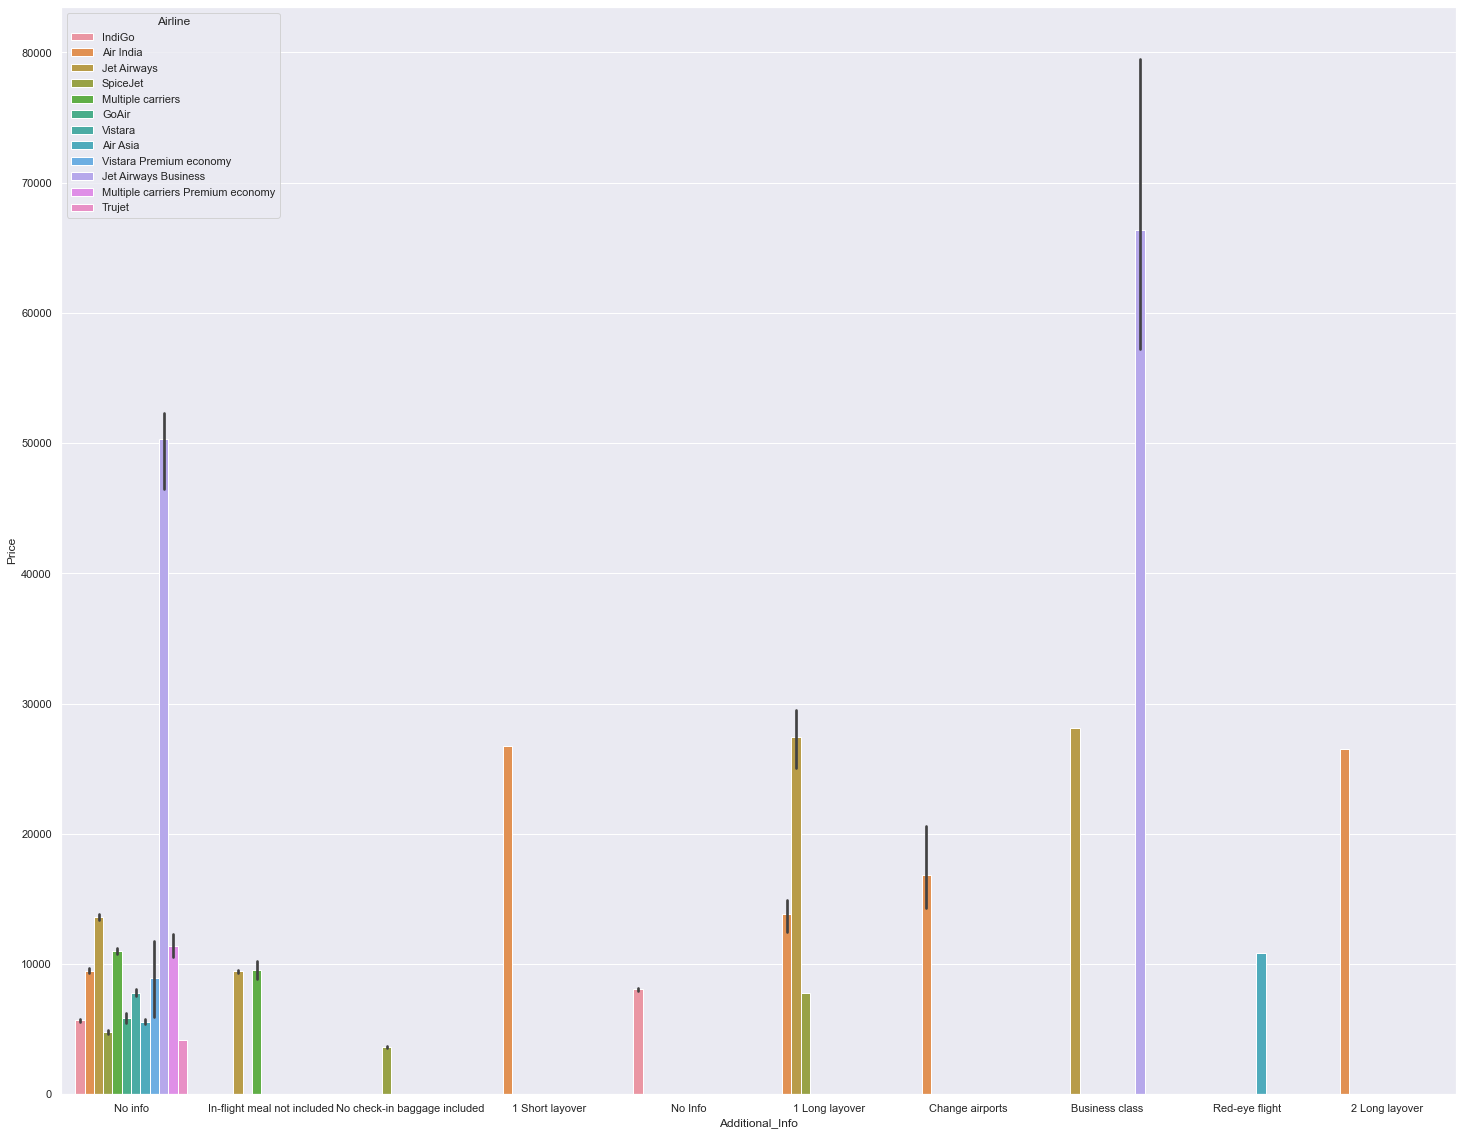

In [491]:
plt.figure(figsize= (25 ,20))
sns.barplot(x= Data_Airline['Additional_Info'] , y = Data_Airline['Price']  , hue =Data_Airline['Airline'])

In [492]:
Data_Airline['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

<AxesSubplot:xlabel='Month', ylabel='count'>

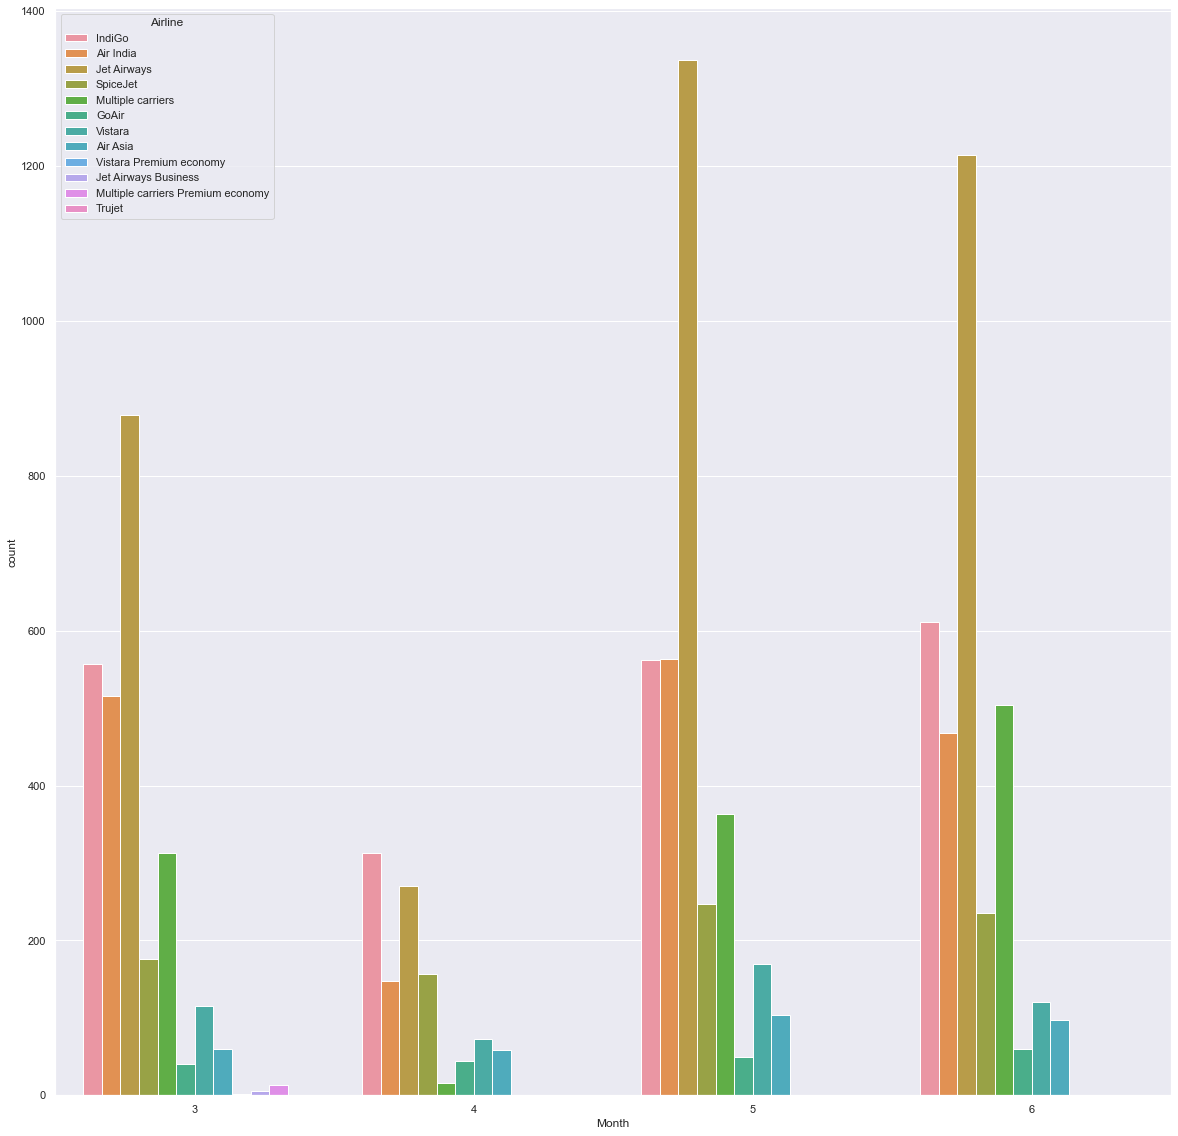

In [493]:
plt.figure(figsize=(20,20))
sns.countplot (x=Data_Airline['Month'],hue= Data_Airline['Airline'])

- increasing the number of stop is more expensive  

In [494]:
# label Encoding  
from cProfile import label
from sklearn.preprocessing import LabelEncoder

label_root = LabelEncoder()

Data_Airline['Total_Stops'] = label_root.fit_transform(Data_Airline['Total_Stops'])
Data_Airline['Additional_Info'] = label_root.fit_transform(Data_Airline['Additional_Info'] )
Data_Airline['Destination']= label_root.fit_transform(Data_Airline['Destination'])
Data_Airline['Airline'] = label_root.fit_transform(Data_Airline['Airline'])
Data_Airline['Route'] = label_root.fit_transform(Data_Airline['Route'])
Data_Airline ['Additional_Info'] = label_root.fit_transform(Data_Airline ['Additional_Info'])
Data_Airline ['Source'] = label_root.fit_transform(Data_Airline ['Source'])


Data_Airline.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Month,Duration_Fnial,Arrive_Time,Starting_Time
0,3,0,5,18,4,8,3897,24,3,2.5,1.10,22.20
1,1,3,0,84,1,8,7662,1,5,7.2,13.15,5.50
2,4,2,1,118,1,8,13882,9,6,1.0,4.25,9.25
3,3,3,0,91,0,8,6218,12,5,5.2,23.30,18.05
4,3,0,5,29,0,8,13302,1,3,4.4,21.35,16.50


<AxesSubplot:>

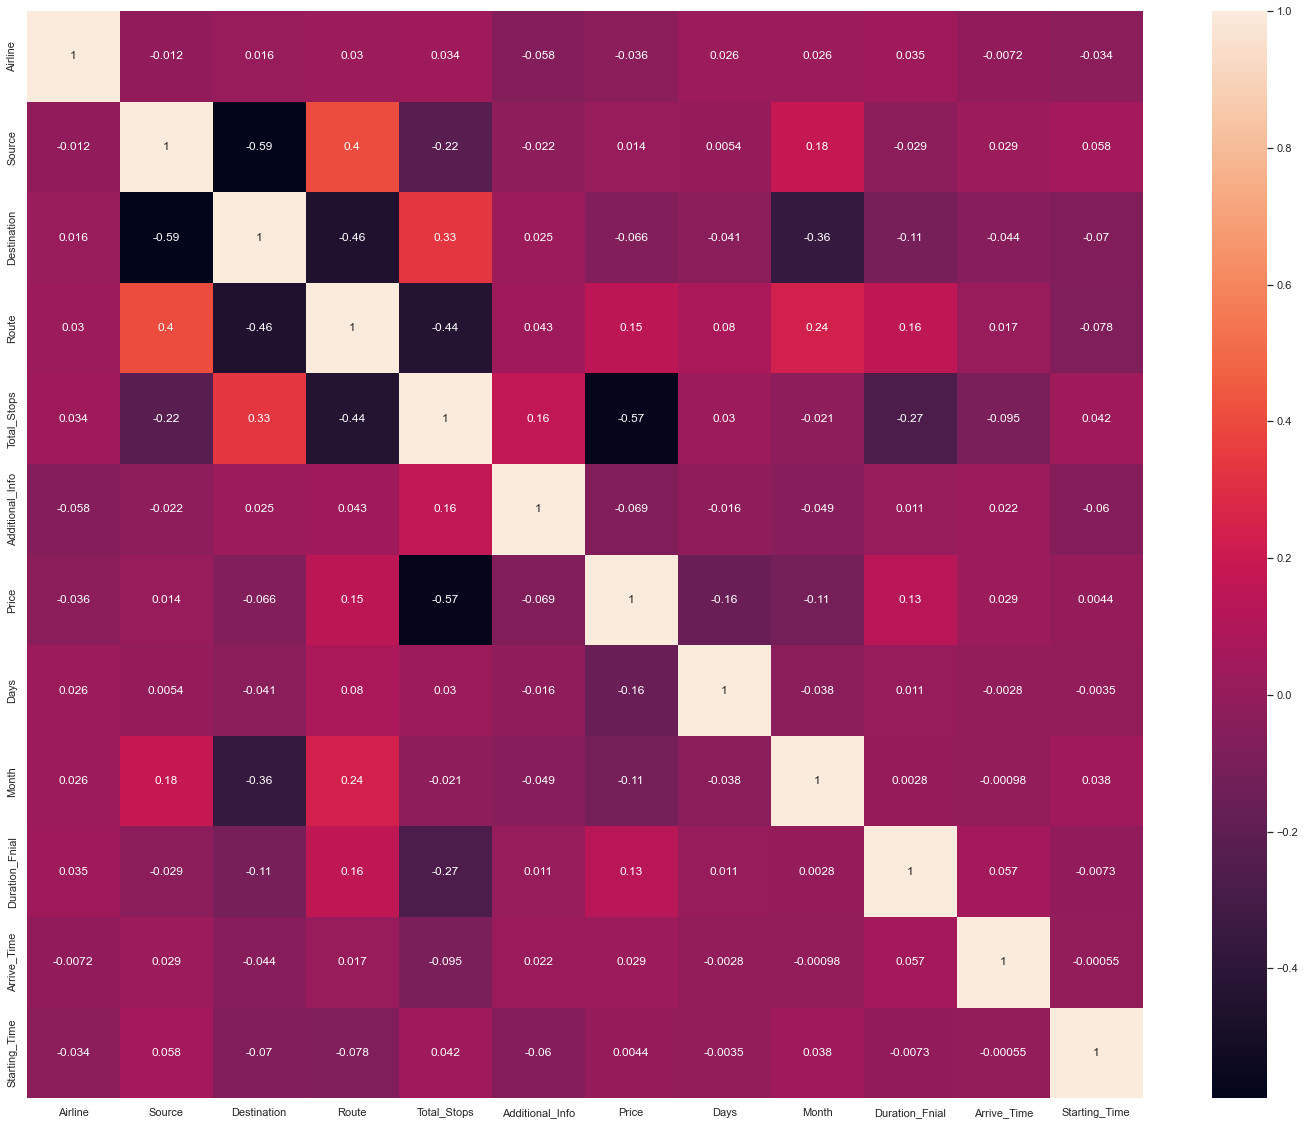

In [495]:
plt.figure(figsize= (25 ,20))
sns.heatmap(data=Data_Airline.corr(),annot=True)

<AxesSubplot:xlabel='Days', ylabel='Price'>

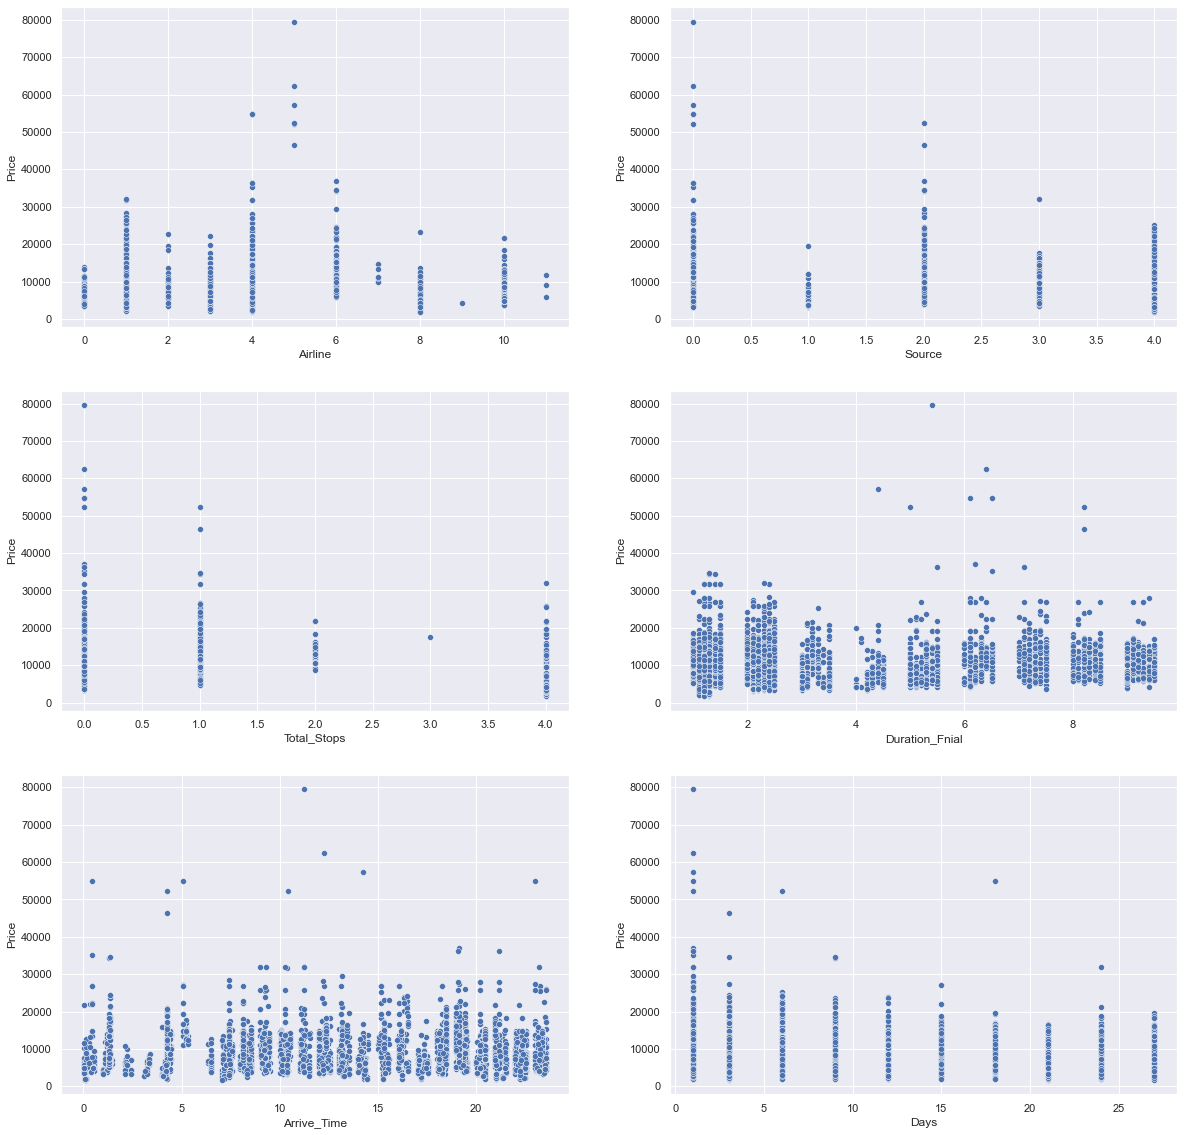

In [496]:
fig , axes = plt.subplots(3,2,figsize = (20,20))
sns.scatterplot (x='Airline' , y= 'Price' , data= Data_Airline, ax =axes[0,0])
sns.scatterplot(x='Source',y='Price' ,data = Data_Airline , ax =axes[0,1])
sns.scatterplot (x= 'Total_Stops', y= 'Price', data= Data_Airline , ax =axes[1,0])
sns.scatterplot (x= 'Duration_Fnial', y= 'Price', data= Data_Airline , ax =axes[1,1])
sns.scatterplot (x= 'Arrive_Time', y= 'Price', data= Data_Airline , ax =axes[2,0])
sns.scatterplot (x= 'Days', y= 'Price', data= Data_Airline , ax =axes[2,1])

In [497]:
Data_Airline.head(n=5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Month,Duration_Fnial,Arrive_Time,Starting_Time
0,3,0,5,18,4,8,3897,24,3,2.5,1.10,22.20
1,1,3,0,84,1,8,7662,1,5,7.2,13.15,5.50
2,4,2,1,118,1,8,13882,9,6,1.0,4.25,9.25
3,3,3,0,91,0,8,6218,12,5,5.2,23.30,18.05
4,3,0,5,29,0,8,13302,1,3,4.4,21.35,16.50


### Machine Learning 

In [498]:
x = Data_Airline.drop('Price',axis =1).values
y = Data_Airline['Price'].values


#### Linear and Polynominal Regression 

In [499]:
def Select_Best_Degree (x,y): 
    degr =1
    #train the model 
    p_poly = PolynomialFeatures (degree= degr)
    x_poly = p_poly.fit_transform(x)

    xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 20)

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(xtrain,ytrain)

    y_pred = linear_reg.predict(xtest)

    avg_lossPre , avg_biasPre , avg_varPre = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

    Prev_Diff = avg_biasPre - avg_varPre 

    print ("Degree : ",degr)
    print(f"Mean Square Error : {avg_lossPre}")
    print (f"Bias Error :  {avg_biasPre}")
    print (f"Variance is : {avg_varPre}")
    print ('-----------------------------------------------------------------------------------------------')

    while(True) :
        degr+=1  
        p_poly = PolynomialFeatures (degree= degr)
        x_poly = p_poly.fit_transform(x)
        xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 1 )
        
        linear_reg = linear_model.LinearRegression()
        linear_reg.fit(xtrain,ytrain)

        y_pred = linear_reg.predict(xtest)

        avg_lossUp , avg_biasUp , avg_varUp = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

        Up_Diff = avg_biasUp - avg_varUp 

        print ("Degree : ",degr)
        print(f"Mean Square Error : {avg_lossUp}")
        print (f"Bias Error :  {avg_biasUp}")
        print (f"Variance is : {avg_varUp}") 
        print ('-----------------------------------------------------------------------------------------------')
        
        if (avg_lossUp<avg_lossPre) and (Up_Diff < Prev_Diff) :
            avg_lossPre = avg_lossUp
            Prev_Diff = Up_Diff
        else : 
            return degr-1

In [500]:
Best_Degree = Select_Best_Degree(x,y)
Best_Degree

Degree :  1
Mean Square Error : 14959592.282944169
Bias Error :  14940374.721855499
Variance is : 19217.56108867282
-----------------------------------------------------------------------------------------------
Degree :  2
Mean Square Error : 7485236.110415168
Bias Error :  7349327.266681732
Variance is : 135908.8437334353
-----------------------------------------------------------------------------------------------
Degree :  3
Mean Square Error : 8684026.641342998
Bias Error :  5065438.61289735
Variance is : 3618588.0284456443
-----------------------------------------------------------------------------------------------


2

#### Decesion Tree 

In [501]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

xtrain , xtest , ytrain ,ytest = train_test_split (x,y,test_size=0.2 , random_state= 20)
D_T = DecisionTreeRegressor()
D_T.fit(xtrain,ytrain)
y_pred = D_T.predict(xtest)

print (f"The Mean square error : {mean_squared_error(ytest,y_pred)}")
print (f"The Mean absoult error : {mean_absolute_error(ytest,y_pred)}")


The Mean square error : 2626594.697098795
The Mean absoult error : 671.8016403885969


#### Random forest

In [502]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error

xtrain , xtest , ytrain ,ytest = train_test_split (x,y,test_size=0.2 , random_state= 20)
R_F_T = RandomForestRegressor()
R_F_T.fit(xtrain,ytrain)
y_pred = R_F_T.predict(xtest)

print (f"The Mean square error : {mean_squared_error(ytest,y_pred)}")
print (f"The Mean absoult error : {mean_absolute_error(ytest,y_pred)}")


The Mean square error : 2406844.3583894693
The Mean absoult error : 641.2318665620094


#### Conclusion
- the best model is random forest 

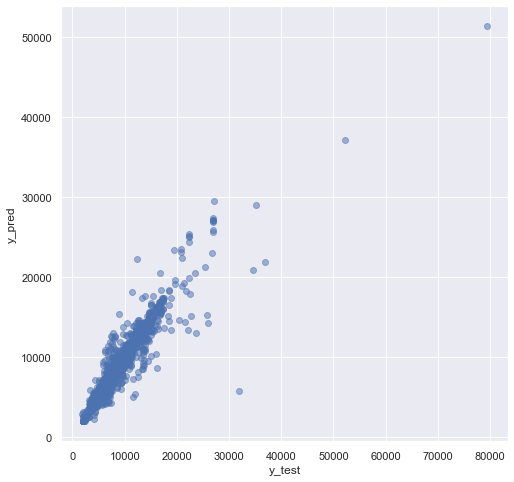

In [503]:
plt.figure(figsize = (8,8))
plt.scatter(ytest, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()